In [1]:
import tensorflow as tf

import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from envs.cartpole import CartPoleEnv

tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
model = tf.keras.models.load_model("cartpole_dqn_mlp_0")
states_df = pd.read_csv('states.csv')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
states_df.head()

,Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity
0,0.120169,0.188109,0.007001,0.080949
1,-0.019918,0.003167,-0.003936,0.002227
2,-0.059823,0.188468,0.017368,-0.305991
3,-0.152837,0.155297,0.006483,-0.315663
4,0.157692,0.197392,0.002007,-0.165481


In [4]:
import shap
shap.initjs()
train_size = 2000
explainer = shap.DeepExplainer(model, states_df[:train_size])
states_df_test = states_df[train_size:]

shap_values = explainer.shap_values(states_df_test.values)

<img src="media/cart_explained.jpg" width="500" height="500">

In [5]:
env = CartPoleEnv()

Cart Position           -0.011399
Cart Velocity           -0.006756
Pole Angle               0.024878
Pole Angular Velocity    0.182856
Name: 2020, dtype: float64
[[0.5281464  0.54287038]]


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


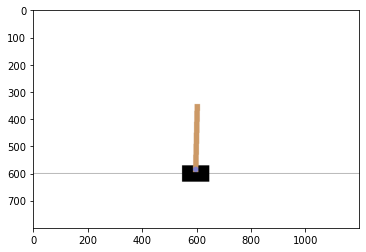

In [6]:
idx = 20
env.state = states_df_test.iloc[idx, :].values
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

# img.set_data(env.render(mode='rgb_array')) # just update the data
# display.display(plt.gcf())
# display.clear_output(wait=True)
env.close()

print(states_df_test.iloc[idx, :])

print(model.predict(states_df_test.iloc[idx, :].values.reshape([1, env.observation_space.shape[0]])))

direction = 0
shap.force_plot(explainer.expected_value[direction], shap_values[direction][idx], states_df_test.iloc[idx])


In [7]:
direction = 1
shap.force_plot(explainer.expected_value[direction], shap_values[direction][idx], states_df_test.iloc[idx])

In [8]:
shap.force_plot(explainer.expected_value[0], shap_values[0], states_df_test)

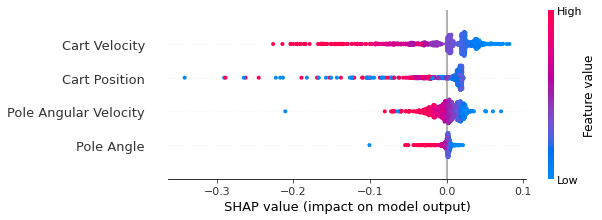

In [9]:
shap.summary_plot(shap_values[0], states_df_test)

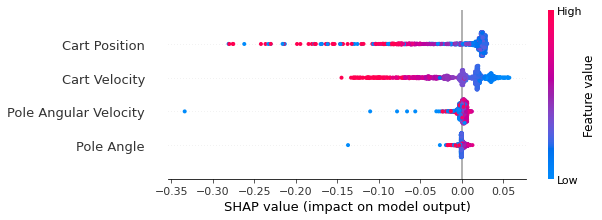

In [10]:
shap.summary_plot(shap_values[1], states_df_test)

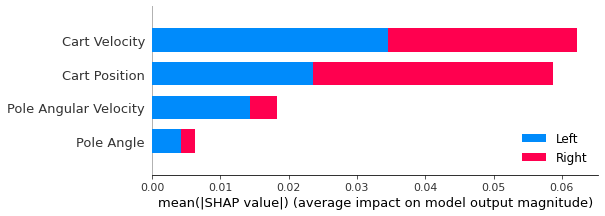

In [11]:
shap.summary_plot(shap_values, states_df_test, plot_type="bar", class_names=['Left', 'Right'])

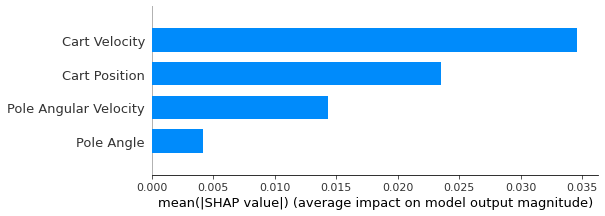

In [12]:
direction = 0
shap.summary_plot(shap_values[direction], states_df_test, plot_type="bar", class_names=['Left', 'Right'])

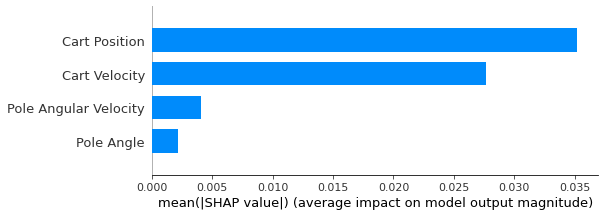

In [13]:
direction = 1
shap.summary_plot(shap_values[direction], states_df_test, plot_type="bar", class_names=['Left', 'Right'])

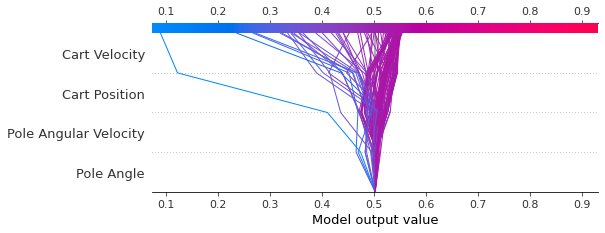

In [14]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][:100], states_df_test[:100])

In [32]:
states_df.head(0)

,Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity


Cart Position            2.0
Cart Velocity            1.0
Pole Angle               0.0
Pole Angular Velocity    0.0
Name: 1, dtype: float64


array([[0.26305598, 0.20990524]])

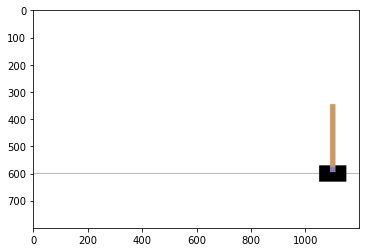

In [27]:
custom_states = np.asarray([[-2, -0.5, 0.2, 0.3], [2, 1, 0, 0]]).reshape([2, env.observation_space.shape[0]])
custom_states_df = pd.DataFrame(data=custom_states, index=None, columns=states_df.columns)

idx = 1
env.state = custom_states_df.iloc[idx, :].values
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

# img.set_data(env.render(mode='rgb_array')) # just update the data
# display.display(plt.gcf())
# display.clear_output(wait=True)
env.close()

print(custom_states_df.iloc[idx, :])

shap_values = explainer.shap_values(custom_states_df.values)

model.predict(custom_states_df.iloc[idx, :].values.reshape([1, env.observation_space.shape[0]]))

In [28]:
shap.force_plot(explainer.expected_value[0], shap_values[0][idx], custom_states_df.iloc[idx])

In [29]:
shap.force_plot(explainer.expected_value[1], shap_values[1][idx], custom_states_df.iloc[idx])